In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv('imports-85.data',names = ['symboling','normalized_losses','make','fuel_type','aspiration','num_of_doors','body_style','drive_wheels','engine_location','wheel_base','length','width','height','curb_weight','engine_type','num_of_cylinders','engine_size','fuel_system','bore','stroke','compression_ratio','horsepower','peak_rpm','city_mpg','highway_mpg','price'])

In [4]:
data.head().transpose()

,0,1,2,3,4
symboling,3,3,1,2,2
normalized_losses,?,?,?,164,164
make,alfa-romero,alfa-romero,alfa-romero,audi,audi
fuel_type,gas,gas,gas,gas,gas
aspiration,std,std,std,std,std
num_of_doors,two,two,two,four,four
body_style,convertible,convertible,hatchback,sedan,sedan
drive_wheels,rwd,rwd,rwd,fwd,4wd
engine_location,front,front,front,front,front
wheel_base,88.6,88.6,94.5,99.8,99.4


In [5]:
data = data.drop(columns=['fuel_type','make','aspiration','engine_location','fuel_system','num_of_doors','drive_wheels','engine_type','body_style','normalized_losses'])

In [6]:
data = data.replace('?',np.nan)

In [7]:
data['cylinders'] = data['num_of_cylinders'].replace({'one':1,'two':2,'three':3,'four':4,'five':5,'six':6,'seven':7,'eight':8,'nine':9,'ten':10,'eleven':11,'twelve':12})

In [8]:
data.dtypes

symboling              int64
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
num_of_cylinders      object
engine_size            int64
bore                  object
stroke                object
compression_ratio    float64
horsepower            object
peak_rpm              object
city_mpg               int64
highway_mpg            int64
price                 object
cylinders              int64
dtype: object

In [9]:
data['bore'] = data['bore'].astype('float64')
data['stroke'] = data['stroke'].astype('float64')
data['horsepower'] = data['horsepower'].astype('float64')
data['peak_rpm'] = data['peak_rpm'].astype('float64')
data['price'] = data['price'].astype('float64')


In [10]:
data.iloc[:,:].isna().sum()
data_s = data.iloc[:,1:]

In [11]:
data['bore'] = data['bore'].fillna(data['bore'].median())
data['stroke'] = data['stroke'].fillna(data['stroke'].median())
data['horsepower'] = data['horsepower'].fillna(data['horsepower'].median())
data['peak_rpm'] = data['peak_rpm'].fillna(data['peak_rpm'].median())
data['price'] = data['price'].fillna(data['price'].median())

In [12]:
import seaborn as sns

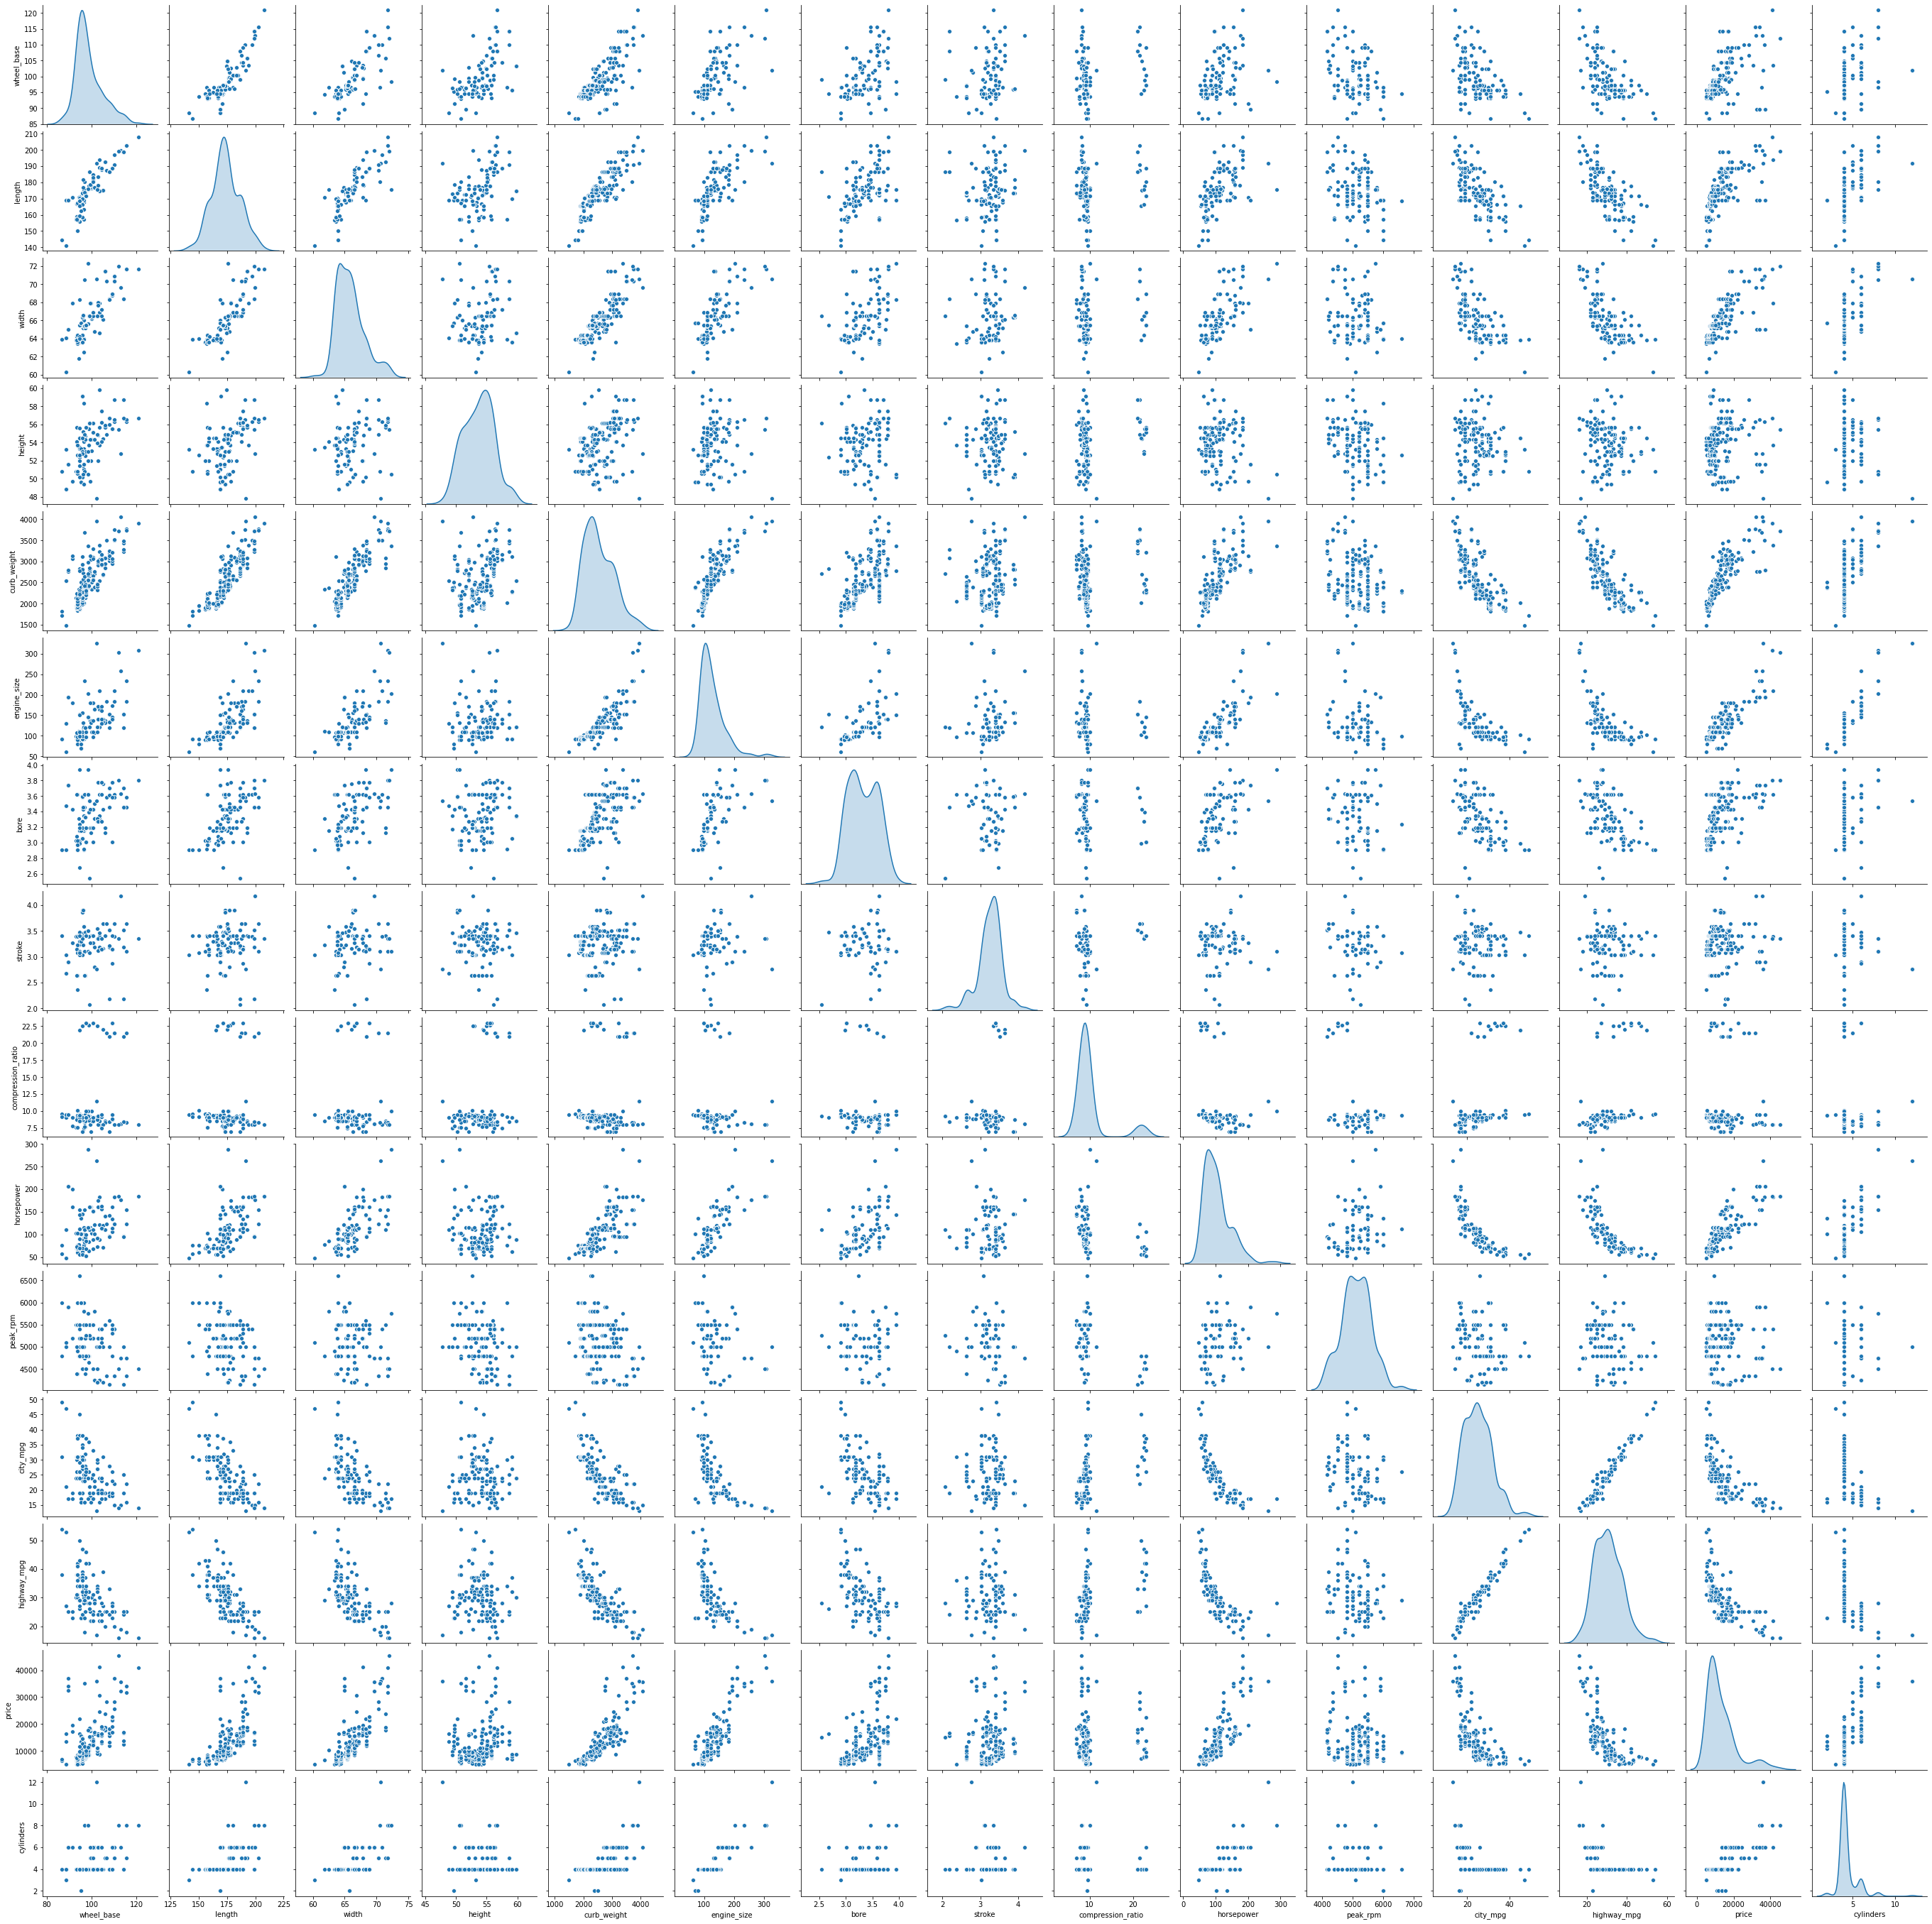

In [13]:
sns.pairplot(data_s,diag_kind='kde')

In [14]:
x = data.drop(columns = ['price','num_of_cylinders'])
y = data['price']

In [15]:
print(x)
print(y)

     symboling  wheel_base  length  width  height  curb_weight  engine_size  \
0            3        88.6   168.8   64.1    48.8         2548          130   
1            3        88.6   168.8   64.1    48.8         2548          130   
2            1        94.5   171.2   65.5    52.4         2823          152   
3            2        99.8   176.6   66.2    54.3         2337          109   
4            2        99.4   176.6   66.4    54.3         2824          136   
..         ...         ...     ...    ...     ...          ...          ...   
200         -1       109.1   188.8   68.9    55.5         2952          141   
201         -1       109.1   188.8   68.8    55.5         3049          141   
202         -1       109.1   188.8   68.9    55.5         3012          173   
203         -1       109.1   188.8   68.9    55.5         3217          145   
204         -1       109.1   188.8   68.9    55.5         3062          141   

     bore  stroke  compression_ratio  horsepower  p

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 1)

In [19]:
from sklearn.linear_model import LinearRegression
regression_model = LinearRegression()

In [20]:
regression_model.fit(x_train,y_train)

LinearRegression()

In [28]:
for index,column in enumerate(x_train.columns):
    print(f"the coeffiecient for {column} is {regression_model.coef_[index]}")

the coeffiecient for symboling is 88.57794900972111
the coeffiecient for wheel_base is 71.82402760934465
the coeffiecient for length is -93.3844787201179
the coeffiecient for width is 479.81643559267957
the coeffiecient for height is 315.2038400121208
the coeffiecient for curb_weight is -0.8657326891350792
the coeffiecient for engine_size is 251.7436258279204
the coeffiecient for bore is -6832.550987635444
the coeffiecient for stroke is -5085.8188597906
the coeffiecient for compression_ratio is 335.76825192963855
the coeffiecient for horsepower is -0.03898796131240534
the coeffiecient for peak_rpm is 2.4300494935823735
the coeffiecient for city_mpg is -201.8171320034735
the coeffiecient for highway_mpg is -41.93431935731788
the coeffiecient for cylinders is -3176.176090372966


In [43]:
print(f"the intercept is {regression_model.intercept_}")

the intercept is -12323.060174569513


In [44]:
regression_model.score(x_test,y_test)

0.836217648329037

In [46]:
import statsmodels.formula.api as smf

In [48]:
data_stat = pd.concat([x_train,y_train],axis = 1)

In [50]:
data_stat.head()

,symboling,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,cylinders,price
14,1,103.5,189.0,66.9,55.7,3055,164,3.31,3.19,9.0,121.0,4250.0,20,25,6,24565.0
162,0,95.7,166.3,64.4,52.8,2140,98,3.19,3.03,9.0,70.0,4800.0,28,34,4,9258.0
59,1,98.8,177.8,66.5,53.7,2385,122,3.39,3.39,8.6,84.0,4800.0,26,32,4,8845.0
19,1,94.5,155.9,63.6,52.0,1874,90,3.03,3.11,9.6,70.0,5400.0,38,43,4,6295.0
177,-1,102.4,175.6,66.5,53.9,2458,122,3.31,3.54,8.7,92.0,4200.0,27,32,4,11248.0


In [51]:
data_form = smf.ols(formula = 'price ~ length+ engine_size + bore+ stroke + compression_ratio + curb_weight+ peak_rpm + horsepower + cylinders',data=data_stat).fit()

In [53]:
print(data_form.params)

Intercept            5288.476598
length                 37.684362
engine_size           236.473337
bore                -6289.597497
stroke              -4995.909031
compression_ratio     229.718178
curb_weight             2.143737
peak_rpm                2.637443
horsepower              6.327490
cylinders           -3084.559349
dtype: float64


In [55]:
print(data_form.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     66.50
Date:                Wed, 12 Aug 2020   Prob (F-statistic):           1.11e-46
Time:                        06:14:07   Log-Likelihood:                -1461.3
No. Observations:                 153   AIC:                             2943.
Df Residuals:                     143   BIC:                             2973.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          5288.4766    1.2e+0